First we need to get the files.

In [79]:
from os import listdir
from os.path import isfile, join
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

kanto_data_path = "/home/infernov/Desktop/Summer/data/tokyo"
file_names = [f for f in listdir(kanto_data_path) if isfile(join(kanto_data_path,f))] # list all files

Here we showcase a time series from the data, just to give a feel of how the data looks.

In [80]:
def parser(x):
    if x[-4:] == '2400':
        x = x[:-4] + '0000'
    return datetime.strptime(x, "%Y%m%d%H%M")
showcase_series = pd.read_csv(join(kanto_data_path, file_names[0]), delimiter='\t', parse_dates=[0], date_parser=parser, index_col=0) 

In [81]:
showcase_series.head()

,pr,f_pr,max_ws,f_max_ws,ave_wv,f_ave_wv,ave_ws,f_ave_ws,max_tp,f_max_tp,min_tp,f_min_tp,sl,f_sl,sd,f_sd,dsd,f_dsd
datetime,,,,,,,,,,,,,,,,,,
2012-01-01 00:10:00,0.0,0,3.0,17,0.0,17,0.0,17,-43.0,0,-46.0,0,0.0,2,NaN,56,NaN,56
2012-01-01 00:20:00,0.0,0,5.0,17,0.0,17,1.0,17,-44.0,0,-46.0,0,0.0,2,NaN,56,NaN,56
2012-01-01 00:30:00,0.0,0,5.0,17,0.0,17,1.0,17,-44.0,0,-46.0,0,0.0,2,NaN,56,NaN,56
2012-01-01 00:40:00,0.0,0,14.0,17,36.0,17,10.0,17,-44.0,0,-47.0,0,0.0,2,NaN,56,NaN,56
2012-01-01 00:50:00,0.0,0,11.0,17,0.0,17,2.0,17,-44.0,0,-47.0,0,0.0,2,NaN,56,NaN,56


In [82]:
showcase_series.shape

(276048, 18)

We now proceed to plot the showcase data. We cannot do this straight away because the number of data points are huge and thus plotting will consume a lot of time. Instead, we downsample the data first.

In [83]:
resampled_data = showcase_series.resample("5D").mean()

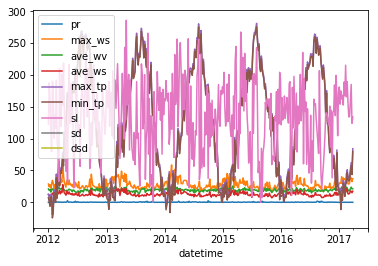

In [84]:
resampled_data[resampled_data.columns.drop(list(resampled_data.filter(regex="f_")))].plot()
plt.show()

We now proceed to downsample **all** the files.

In [85]:
def load_sensor_data(name):
    df = pd.read_csv(join(kanto_data_path, name), delimiter='\t', parse_dates=[0], date_parser=parser, index_col=0)
    return df

def write_sensor_data(sensor_dataframe, destination):
    sensor_dataframe.to_csv(destination)
    
sampling_rate = 'D'

In [87]:
for file_name in file_names:
    sensor_dataframe = load_sensor_data(file_name)
    resampled_dataframe = sensor_dataframe.resample(sampling_rate).mean()
    write_sensor_data(resampled_dataframe, destination=join('./resampled', file_name))

KeyboardInterrupt: 

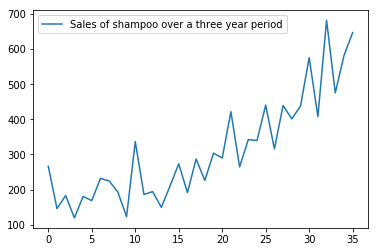

In [25]:
data.plot()